In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score,roc_auc_score,RocCurveDisplay

In [2]:
db_data=pd.read_csv("DS1_C9_S5_Practice_Diabetes_Data.csv")
db_data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
db_data.shape

(768, 8)

In [5]:
columns=db_data.columns
columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
db_data.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

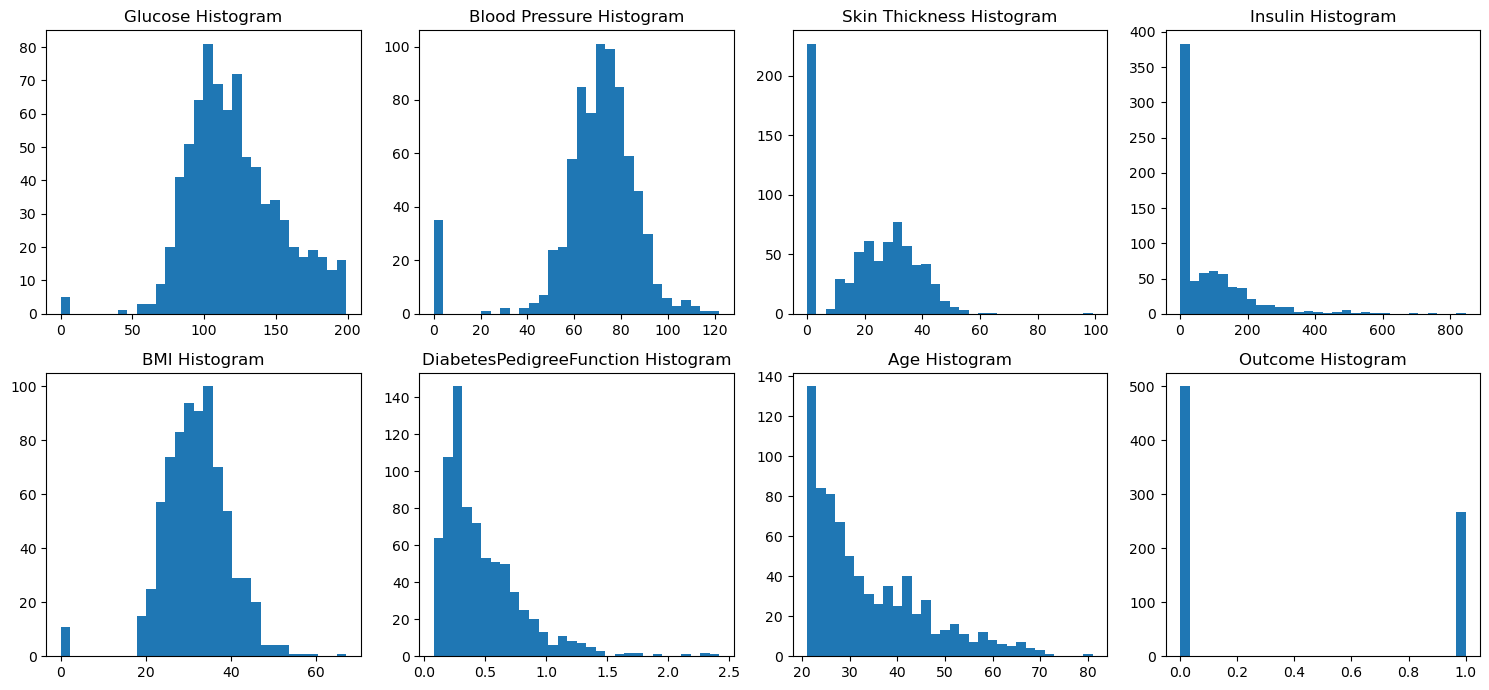

In [7]:
fig,ax=plt.subplots(2,4,figsize=(15,7))
ax[0,0].set_title("Glucose Histogram")
ax[0,0].hist(db_data["Glucose"],bins=30,label="Glucose Histogram")
ax[0,1].hist(db_data["BloodPressure"],bins=30)
ax[0,1].set_title("Blood Pressure Histogram")
ax[0,2].hist(db_data["SkinThickness"],bins=30)
ax[0,2].set_title("Skin Thickness Histogram")
ax[0,3].hist(db_data["Insulin"],bins=30)
ax[0,3].set_title("Insulin Histogram")
ax[1,0].hist(db_data["BMI"],bins=30)
ax[1,0].set_title("BMI Histogram")
ax[1,1].hist(db_data["DiabetesPedigreeFunction"],bins=30)
ax[1,1].set_title("DiabetesPedigreeFunction Histogram")
ax[1,2].hist(db_data["Age"],bins=30)
ax[1,2].set_title("Age Histogram")
ax[1,3].hist(db_data["Outcome"],bins=30)
ax[1,3].set_title("Outcome Histogram")
plt.tight_layout()
plt.show()

In [8]:
outcome=db_data.loc[:,["Outcome"]]

In [9]:
new_df=db_data.drop(["Outcome"],axis=1)

In [10]:
new_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [11]:
data=[]
for col in new_df:
    UO=[]
    LO=[]
    columns_df=pd.Series(new_df[col])
    Max=max(columns_df)
    Min=min(columns_df)
    Range=Max-Min
    Q1=columns_df.quantile(0.25)
    Q2=columns_df.quantile(0.50)
    Q3=columns_df.quantile(0.75)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for Z in new_df[col]:
        if Z>UF:
         UO.append(Z)
        elif Z<LF:
            LO.append(Z)
    data.append((col,Max,Min,Range,Q1,Q2,Q3,IQR,UF,LF,[[LO,UO]]))
columns_series=["Columns","Maximum","Minimum","Range","Q1","Q2","Q3","IQR","UF","LF","Outliers"]
datas=pd.DataFrame(data,columns=columns_series)
datas

,Columns,Maximum,Minimum,Range,Q1,Q2,Q3,IQR,UF,LF,Outliers
0,Glucose,199.00,0.000,199.000,99.00000,117.0000,140.25000,41.2500,202.125,37.125,"[[[0, 0, 0, 0, 0], []]]"
1,BloodPressure,122.00,0.000,122.000,62.00000,72.0000,80.00000,18.0000,107.000,35.000,"[[[0, 0, 30, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0,..."
2,SkinThickness,99.00,0.000,99.000,0.00000,23.0000,32.00000,32.0000,80.000,-48.000,"[[[], [99]]]"
3,Insulin,846.00,0.000,846.000,0.00000,30.5000,127.25000,127.2500,318.125,-190.875,"[[[], [543, 846, 342, 495, 325, 485, 495, 478,..."
4,BMI,67.10,0.000,67.100,27.30000,32.0000,36.60000,9.3000,50.550,13.350,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
5,DiabetesPedigreeFunction,2.42,0.078,2.342,0.24375,0.3725,0.62625,0.3825,1.200,-0.330,"[[[], [2.288, 1.441, 1.39, 1.893, 1.781, 1.222..."
6,Age,81.00,21.000,60.000,24.00000,29.0000,41.00000,17.0000,66.500,-1.500,"[[[], [69, 67, 72, 81, 67, 67, 70, 68, 69]]]"


In [12]:
def iqr_winsorization(df):
    df_c=df.copy()
    col_to_treat=df_c.columns
    for  col in col_to_treat:
        Q1=df_c[col].quantile(0.25)
        Q2=df_c[col].quantile(0.50)
        Q3=df_c[col].quantile(0.75)
        IQR=Q3-Q1
        UF=Q3+1.5*IQR
        LF=Q1-1.5*IQR
        df_c.loc[df_c[col]>UF,col]=UF
        df_c.loc[df_c[col]<LF,col]=LF
    return df_c
df=pd.DataFrame(new_df)
treated_df=iqr_winsorization(df.copy())

C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_16432\4048271477.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '202.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_c.loc[df_c[col]>UF,col]=UF
C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_16432\4048271477.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '318.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_c.loc[df_c[col]>UF,col]=UF
C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_16432\4048271477.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_c.loc[df_c[col]>UF,col]=UF


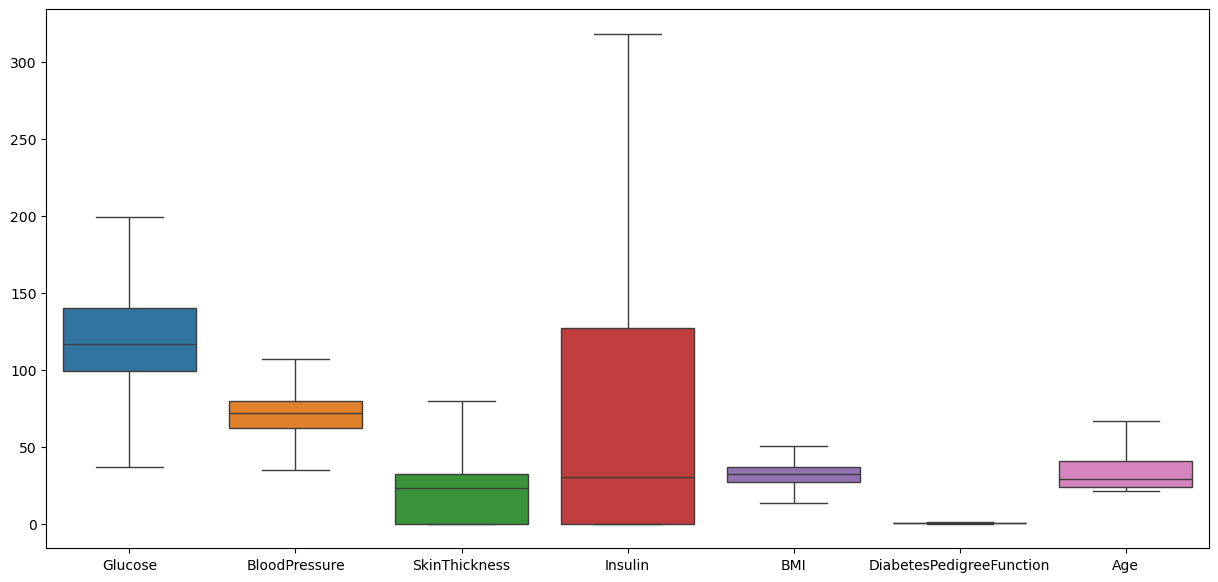

In [13]:
sns.boxplot(data=treated_df)
plt.gcf().set_size_inches(15,7)

In [14]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(treated_df)
df_scaled=pd.DataFrame(df_scaled,columns=treated_df.columns)
df_scaled

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691
1,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304
2,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252
3,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828
4,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199
...,...,...,...,...,...,...,...
763,-0.646072,0.374620,1.735982,1.137221,0.109998,-1.008772,2.564372
764,0.027714,-0.048273,0.409758,-0.787602,0.663583,-0.416642,-0.533513
765,-0.004371,0.092691,0.157144,0.410066,-0.841032,-0.749497,-0.275356
766,0.156054,-0.753094,-1.295388,-0.787602,-0.287447,-0.385109,1.187534


In [15]:
df_scaled=pd.concat([df_scaled,outcome],axis=1)
df_scaled

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691,1
1,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304,0
2,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252,1
3,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828,0
4,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199,1
...,...,...,...,...,...,...,...,...
763,-0.646072,0.374620,1.735982,1.137221,0.109998,-1.008772,2.564372,0
764,0.027714,-0.048273,0.409758,-0.787602,0.663583,-0.416642,-0.533513,0
765,-0.004371,0.092691,0.157144,0.410066,-0.841032,-0.749497,-0.275356,0
766,0.156054,-0.753094,-1.295388,-0.787602,-0.287447,-0.385109,1.187534,1


In [16]:
db_train,db_test=train_test_split(df_scaled,test_size=0.2,shuffle=True,random_state=0)

In [17]:
X_train=db_train.drop(["Outcome"],axis=1)
X_test=db_test.drop(["Outcome"],axis=1)
y_train=db_train["Outcome"]
y_test=db_test["Outcome"]

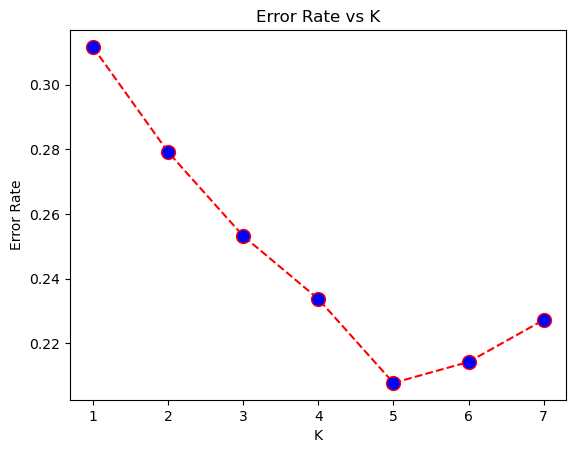

In [18]:
error_rate=[]
for i in range(1,8):
    clf_food=neighbors.KNeighborsClassifier(n_neighbors=i)
    clf_food.fit(X_train,y_train)
    predictions=clf_food.predict(X_test)
    error_rate.append(np.mean(predictions!=y_test))
plt.plot(range(1,8),error_rate,color="red",markerfacecolor="blue",marker="o",markersize=10,linestyle="dashed")
plt.title("Error Rate vs K")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

In [19]:
import math as m

In [20]:
n=768
k=round(m.sqrt(n))
print(k)

28


In [21]:
k=5

In [23]:
cls_db=neighbors.KNeighborsClassifier(n_neighbors=k)
cls_db

KNeighborsClassifier()

In [26]:
cls_db2=cls_db.fit(X_train,y_train)
cls_db2

KNeighborsClassifier()

In [40]:
predictions=cls_db.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [34]:
print("various classes:",cls_db.classes_)
print("Neighbors:",cls_db.n_neighbors)

various classes: [0 1]
Neighbors: 5


In [64]:
from sklearn.metrics import confusion_matrix
print("recall score:",recall_score(y_test,predictions,average="micro"))
print("accuracy_score:",accuracy_score(y_test,predictions))
print("f1 score:",f1_score(y_test,predictions,average="micro"))
print("precision score:",precision_score(y_test,predictions,average="micro"))

recall score: 0.7922077922077922
accuracy_score: 0.7922077922077922
f1 score: 0.7922077922077922
precision score: 0.7922077922077922


Overall Interpretation:
The K-Nearest Neighbors (KNN) model shows consistent performance across all metrics, with recall, precision, F1-score, and accuracy all at 79.22%. This suggests a well-balanced model that correctly identifies both positive and negative cases with high reliability. The F1 score of 0.792 indicates a strong balance between precision and recall, meaning the model makes relatively few false positives and false negatives. The high recall suggests it effectively detects positive cases, making it suitable for applications where missing positives is costly. Further optimization, such as tuning the number of neighbors (K) or feature scaling, could enhance performance.